**TASK 1 : TITANIC SURVIVAL**

In [81]:
## IMPORTING LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [82]:
## IMPORTING DATASET AS CSV FILE

titanic=pd.read_csv(r"/content/tested.csv")

In [83]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [84]:
  titanic.shape

(418, 12)

In [85]:
## INFORMATION ABOUT THE DATASET

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [86]:
## CHECKING NULL VALUES

titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [87]:
## DROPPING CABIM COLUMN AS IT CONTAINS MORE THAN 50% NULL VALUES

titanic=titanic.drop(columns="Cabin",axis=1)

In [88]:
titanic.shape

(418, 11)

In [89]:
## CABIN COLUMN IS REMOVED

titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [90]:
## DESCRIPTION OF THE DATASET

titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [91]:
## FILLING THE NULL VALUES WITH THE MEAN

titanic["Age"].fillna(titanic["Age"].mean(),inplace=True)

In [92]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [93]:
titanic["Fare"].fillna(titanic["Fare"].mean(),inplace=True)

In [94]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [95]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [96]:
titanic.value_counts()

PassengerId  Survived  Pclass  Name                         Sex     Age       SibSp  Parch  Ticket     Fare     Embarked
892          0         3       Kelly, Mr. James             male    34.50000  0      0      330911     7.8292   Q           1
1205         1         3       Carr, Miss. Jeannie          female  37.00000  0      0      368364     7.7500   Q           1
1177         0         3       Dennis, Mr. William          male    36.00000  0      0      A/5 21175  7.2500   S           1
1176         1         3       Rosblom, Miss. Salli Helena  female  2.00000   1      1      370129     20.2125  S           1
1175         1         3       Touma, Miss. Maria Youssef   female  9.00000   1      1      2650       15.2458  C           1
                                                                                                                           ..
1028         0         3       Zakarian, Mr. Mapriededer    male    26.50000  0      0      2656       7.2250   C          

In [97]:
titanic["Survived"].value_counts()

0    266
1    152
Name: Survived, dtype: int64

**ANALYSING SURVIVED AND NON-SURVIVED CASES**

In [98]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

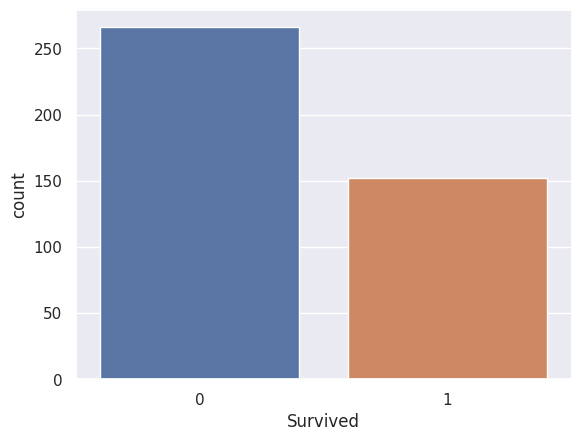

In [99]:
## USING COUNTPLOT ON THE BASIS OF SURVIVED CASES

sns.countplot(x='Survived', data=titanic)


<Axes: xlabel='Sex', ylabel='count'>

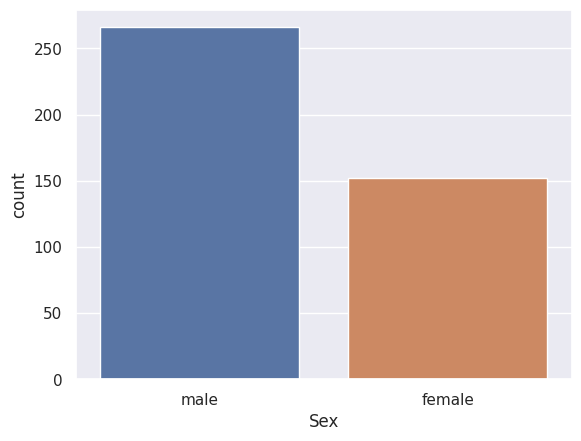

In [100]:
## USING COUNTPLOT ON THE BASIS OF SEX

sns.countplot(x='Sex',data=titanic)

<Axes: xlabel='Sex', ylabel='count'>

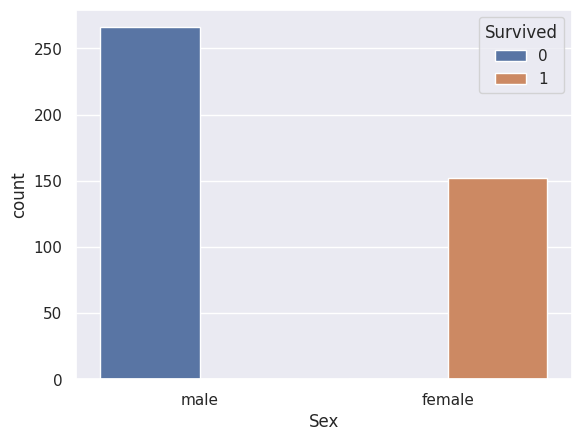

In [101]:
sns.countplot(x='Sex',hue='Survived',data=titanic)

<Axes: xlabel='Pclass', ylabel='count'>

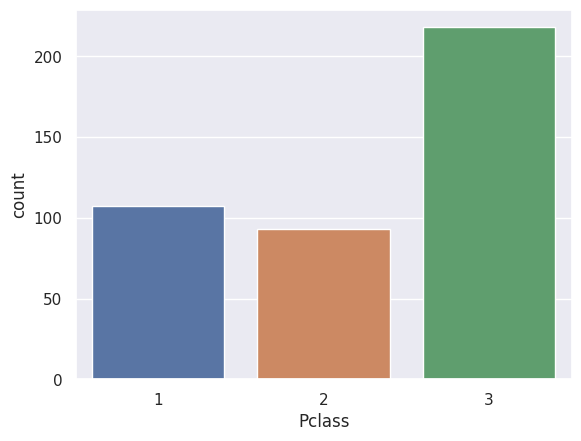

In [102]:
## USING COUNTPLOT ON THE BASIS OF PCLASS

sns.countplot(x='Pclass',data=titanic)

<Axes: xlabel='Embarked', ylabel='count'>

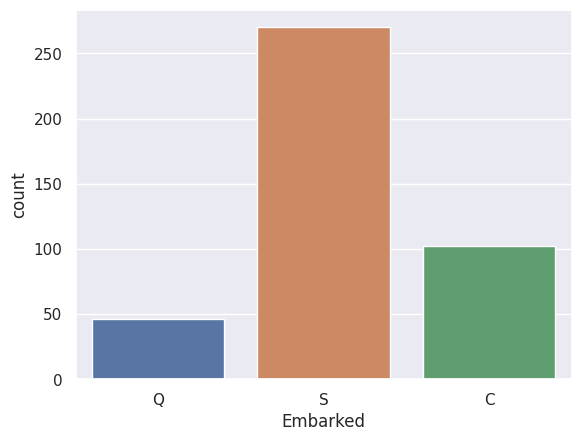

In [103]:
## USING COUNTPLOT ON THE BASIS OF EMBARKED

sns.countplot(x='Embarked',data=titanic)

<ipython-input-104-df8b94ed84d7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['Age'])


<Axes: xlabel='Age', ylabel='Density'>

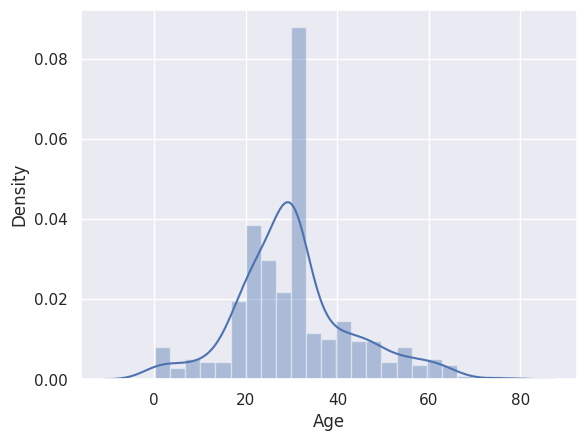

In [104]:
## USING DISTPLOT ON THE BASIS OF AGE

sns.distplot(titanic['Age'])

<ipython-input-105-a36b69a32dae>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

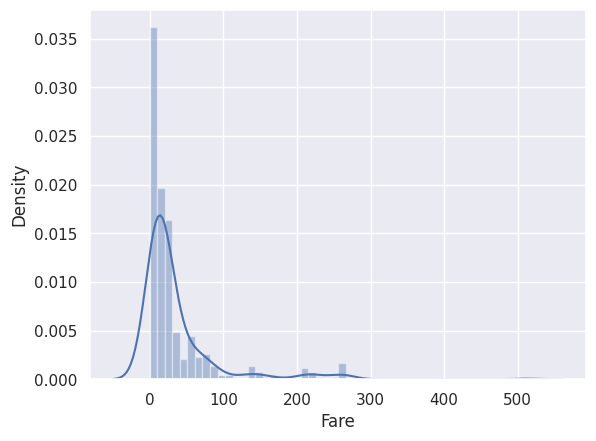

In [105]:
## FOR THE FARE COLUMN

sns.distplot(titanic['Fare'])

<ipython-input-106-6c00221a4c74>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=titanic.corr()


<Axes: >

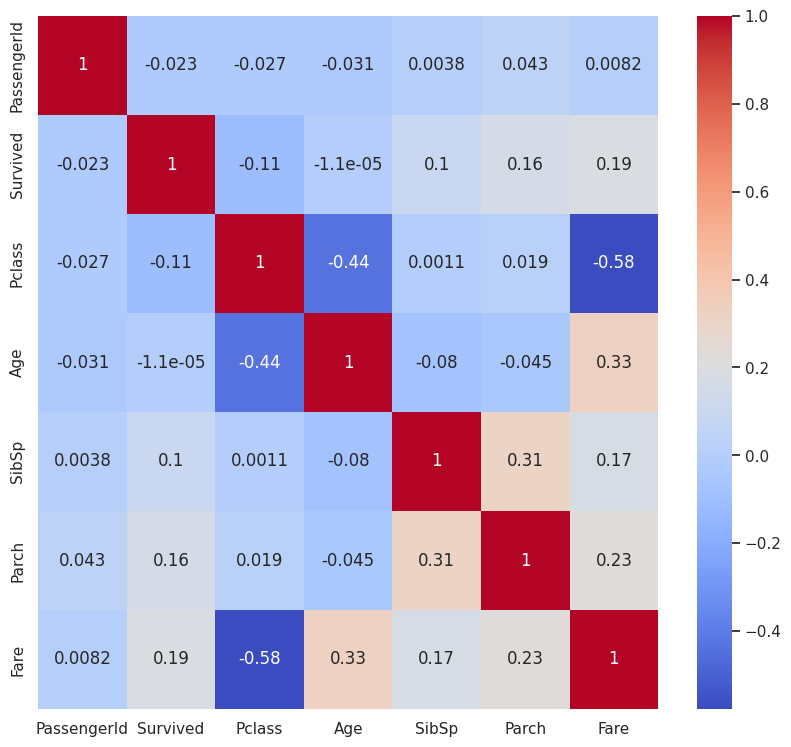

In [106]:
## HEATMAP FOR CHECKING CORRELATION

correlation=titanic.corr()
plt.figure(figsize=(10,9))
sns.heatmap(correlation,annot=True,cmap='coolwarm')


In [107]:
## DROPPING UNWANTED COLUMNS

titanic=titanic.drop(columns=['Name','Ticket'],axis=1)

In [108]:
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.50000,0,0,7.8292,Q
1,893,1,3,female,47.00000,1,0,7.0000,S
2,894,0,2,male,62.00000,0,0,9.6875,Q
3,895,0,3,male,27.00000,0,0,8.6625,S
4,896,1,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,30.27259,0,0,8.0500,S
414,1306,1,1,female,39.00000,0,0,108.9000,C
415,1307,0,3,male,38.50000,0,0,7.2500,S
416,1308,0,3,male,30.27259,0,0,8.0500,S


In [109]:
titanic['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [110]:
titanic["Embarked"].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [111]:
## ENCODING LABEL

from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()

for x in cols:
    titanic[x] = le.fit_transform(titanic[x])
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,1,34.5,0,0,7.8292,1
1,893,1,3,0,47.0,1,0,7.0000,2
2,894,0,2,1,62.0,0,0,9.6875,1
3,895,0,3,1,27.0,0,0,8.6625,2
4,896,1,3,0,22.0,1,1,12.2875,2


In [112]:
## MAKING FEATURES

X = titanic.drop(columns = ['PassengerId','Survived'],axis=1)
Y = titanic['Survived']

In [113]:
print(X)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    1  34.50000      0      0    7.8292         1
1         3    0  47.00000      1      0    7.0000         2
2         2    1  62.00000      0      0    9.6875         1
3         3    1  27.00000      0      0    8.6625         2
4         3    0  22.00000      1      1   12.2875         2
..      ...  ...       ...    ...    ...       ...       ...
413       3    1  30.27259      0      0    8.0500         2
414       1    0  39.00000      0      0  108.9000         0
415       3    1  38.50000      0      0    7.2500         2
416       3    1  30.27259      0      0    8.0500         2
417       3    1  30.27259      1      1   22.3583         0

[418 rows x 7 columns]


In [114]:
print(Y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [115]:
## SPLITTING DATA INTO TRAINING AND TESTING DATA

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [116]:
print(X.shape,x_test.shape,x_train.shape)

(418, 7) (84, 7) (334, 7)


MODEL TRAINING

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [118]:
log=LogisticRegression()

In [119]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 29.5 KB


In [120]:
titanic.astype({'Age':'int','Fare':'int'}).dtypes

PassengerId    int64
Survived       int64
Pclass         int64
Sex            int64
Age            int64
SibSp          int64
Parch          int64
Fare           int64
Embarked       int64
dtype: object

In [121]:
## TRAINING THE DATA

log.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [122]:
x_train_predict=log.predict(x_train)

In [123]:
print(x_train_predict)

[1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 1]


In [124]:
## CHECKING TRAINING DATA ACCURACY

train_accuracy=accuracy_score(y_train,x_train_predict)

In [125]:
print(train_accuracy)

1.0


In [126]:
x_test_predict=log.predict(x_test)

In [127]:
print(x_test_predict)

[0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0]


In [128]:
## CHECKING TESTING DATA ACCURACY

test_accuracy=accuracy_score(y_test,x_test_predict)

In [129]:
print(test_accuracy)

1.0
